In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
ldir = os.chdir(r'C:\Users\K\Desktop\Kristóf\Egyetem\6.félév\Uz.el.mod\Beadandok\2.beadandó 2025.03.04')

In [2]:
df = pd.read_csv('Titanic.csv')

Ismerkedés az adatokkal

In [3]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [4]:
df.shape

(1309, 9)

Típuskonverzió kiszűrése

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   Survived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


Hiányzó adatok vizsgálata

In [6]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [7]:
df=df.dropna(subset=['Embarked']) #hiányzó adatok törlése

In [8]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
Survived       0
dtype: int64

Duplikációk keresése

In [9]:
df[df.duplicated(keep = False)]

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived


Az outlier adatok kiszűrése

In [10]:
# Leíró statisztikai mutatók boxplot diagramon

<Axes: >

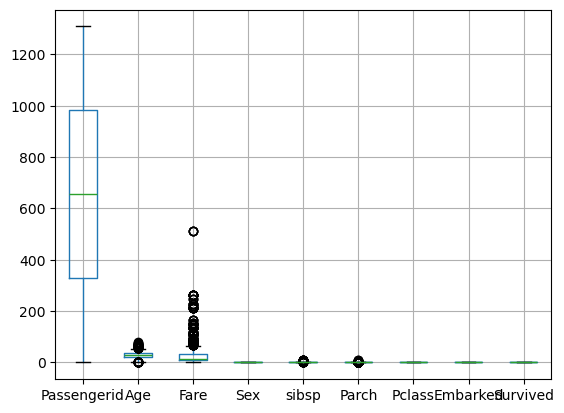

In [11]:
df.boxplot(column = ['Passengerid','Age','Fare','Sex','sibsp','Parch','Pclass','Embarked','Survived',])

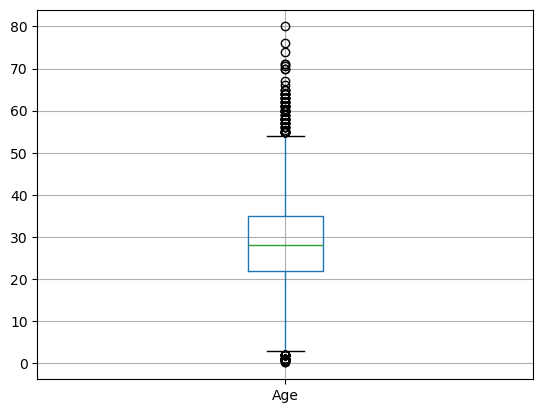

In [12]:
df.boxplot(column=['Age'])
plt.show()

In [13]:
df=df.loc[df['Age']>10]

In [14]:
df=df.loc[df['Age']<40 ]

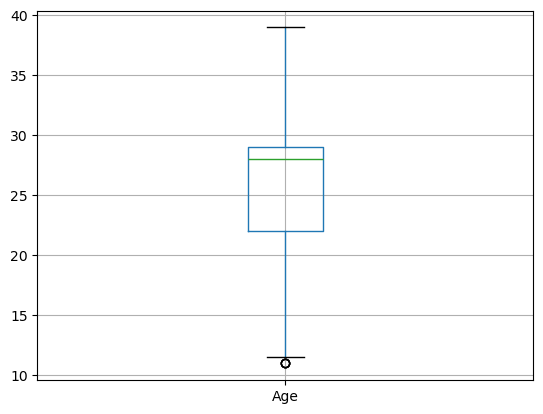

In [15]:
df.boxplot(column=['Age'])
plt.show()

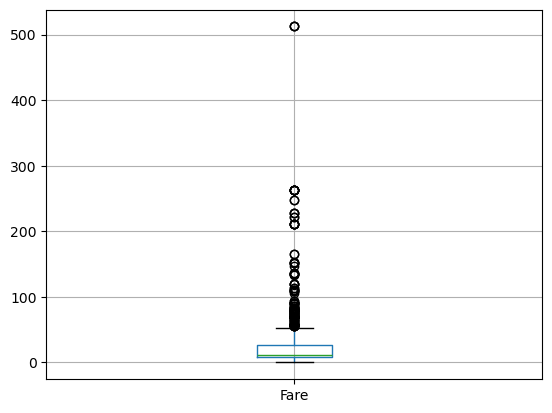

In [16]:
df.boxplot(column=['Fare'])
plt.show()

In [17]:
df=df.loc[df['Fare']<20]

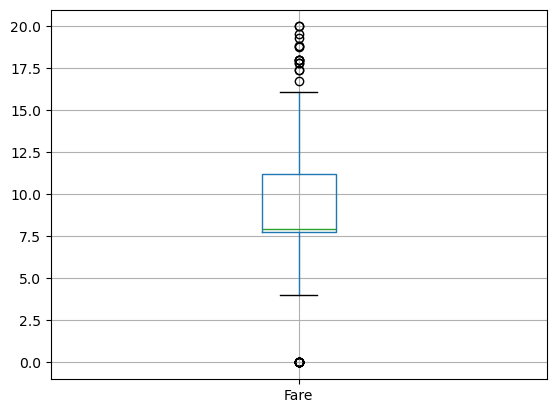

In [18]:
df.boxplot(column=['Fare'])
plt.show()

Korrelációs mátrix 

In [19]:
df.corr()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
Passengerid,1.000000,0.025959,-0.027597,-0.050978,-0.061441,0.000423,-0.029756,-0.051902,-0.333926
Age,0.025959,1.000000,-0.021058,-0.098102,-0.062490,-0.019613,-0.097522,0.001719,-0.049214
Fare,-0.027597,-0.021058,1.000000,0.218735,0.355403,0.276332,-0.200696,-0.056068,0.140155
Sex,-0.050978,-0.098102,0.218735,1.000000,0.150028,0.259262,0.020510,-0.100593,0.417280
sibsp,-0.061441,-0.062490,0.355403,0.150028,1.000000,0.261714,0.092559,-0.013950,0.057104
Parch,0.000423,-0.019613,0.276332,0.259262,0.261714,1.000000,0.013300,-0.095804,0.150960
Pclass,-0.029756,-0.097522,-0.200696,0.020510,0.092559,0.013300,1.000000,-0.130151,-0.062671
Embarked,-0.051902,0.001719,-0.056068,-0.100593,-0.013950,-0.095804,-0.130151,1.000000,-0.093074
Survived,-0.333926,-0.049214,0.140155,0.417280,0.057104,0.150960,-0.062671,-0.093074,1.000000


Hőtérkép

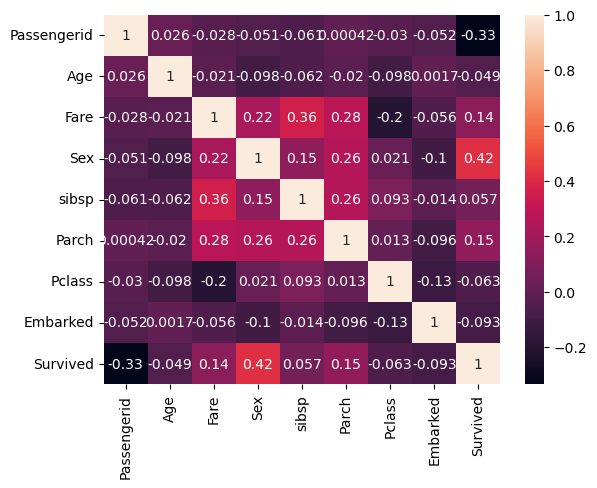

In [20]:
heat_map = sb.heatmap(df.corr(),annot = True)
plt.show()

A korrelációs mátrixból leolvasható , hogy erős negatív kapcsolat van a Survived és az Embarked változók között, így az embarkedet kihagyjuk.

In [21]:
df=df.drop(['Embarked'], axis = 1)

A függő és független változók szétválasztása

Multikollinearitás vizsgálata

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# független változók
X = df[['Passengerid','Age','Fare','Sex','sibsp','Parch','Pclass']]

# VIF dataframe
vif_df = pd.DataFrame()
vif_df["JEGYZET"] = X.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_df)

       JEGYZET        VIF
0  Passengerid   3.836215
1          Age  17.404612
2         Fare   9.263963
3          Sex   1.540692
4        sibsp   1.350807
5        Parch   1.224947
6       Pclass  17.472363


In [23]:
df=df.drop(['Pclass'], axis = 1)

A függő és független változók szétválasztása

In [24]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [25]:
# Sztenderdizáljuk a független változókat
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [26]:
X

array([[-1.71311602, -0.75056823, -0.66534284, -0.61937121,  1.74273614,
        -0.23461558],
       [-1.70788313, -0.00694971, -0.46076474,  1.61454067, -0.36034018,
        -0.23461558],
       [-1.70265024,  1.66619198, -0.42287991, -0.61937121, -0.36034018,
        -0.23461558],
       ...,
       [ 1.69872965,  0.36485956, -0.42287991, -0.61937121, -0.36034018,
        -0.23461558],
       [ 1.70396254,  2.3168582 , -0.66534284, -0.61937121, -0.36034018,
        -0.23461558],
       [ 1.70657899,  0.36485956, -0.42287991, -0.61937121, -0.36034018,
        -0.23461558]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Logisztikus regresszió

In [28]:
from sklearn.linear_model import LogisticRegression
# A modell készítése és tanítása
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

A modell kipróbálása a teszt adatokon.

In [29]:
# A bemeneti X változókból elkülönített, eddig a modell számára nem ismert teszt halmaz alapján becslést készítünk y értékére.
y_predicted = logreg.predict(X_test)

KNN (K legközelebbi szomszéd algoritmus)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
# A modell tanítása
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
k_predicted = knn.predict(X_test) # Teszadatokon történő kipróbálása

Konfúziós mátrix

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_predicted)
print(cnf_matrix)

[[160   7]
 [ 13  13]]


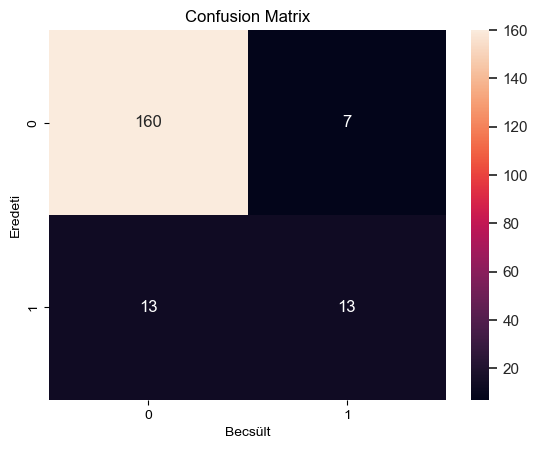

In [33]:
ax= plt.subplot()
sb.set(rc = {'figure.figsize':(5,5)})
sb.heatmap(cnf_matrix,annot=True,fmt='g')
ax.set_title('Confusion Matrix') 
ax.set_xlabel('Becsült')
ax.set_ylabel('Eredeti') 
plt.show()

A klasszikáció fontosabb mutatószámai

In [34]:
print("Accurancy: ", metrics.accuracy_score(y_test,y_predicted))
print("Precision: ", metrics.precision_score(y_test,y_predicted))
print("Recall: ", metrics.recall_score(y_test,y_predicted))

Accurancy:  0.8963730569948186
Precision:  0.65
Recall:  0.5


ROC görbe 

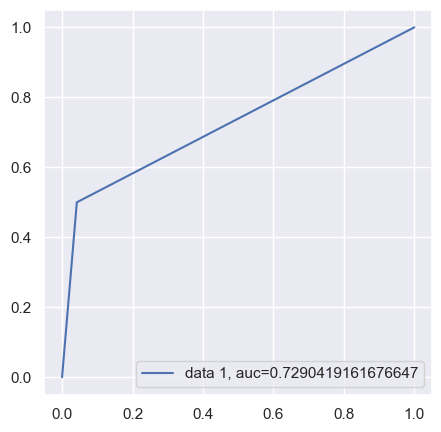

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predicted)
auc = metrics.roc_auc_score(y_test, y_predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [36]:
print (metrics.classification_report(y_test, k_predicted))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       167
           1       0.62      0.58      0.60        26

    accuracy                           0.90       193
   macro avg       0.78      0.76      0.77       193
weighted avg       0.89      0.90      0.89       193



Osztálybasorolás valószínűsége

In [37]:
probs_y=logreg.predict_proba(X_test) # az egyes osztályokba történő besorolások valószínűsége logisztikus regressziónál
np.round(probs_y,2)

array([[0.87, 0.13],
       [0.98, 0.02],
       [0.87, 0.13],
       [0.92, 0.08],
       [0.78, 0.22],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.72, 0.28],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.78, 0.22],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.82, 0.18],
       [0.78, 0.22],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.91, 0.09],
       [0.21, 0.79],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.73, 0.27],
       [0.88, 0.12],
       [0.77, 0.23],
       [0.99, 0.01],
       [0.53, 0.47],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.8 , 0.2 ],
       [0.79, 0.21],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.92, 0.08],
       [0.73, 0.27],
       [0.85, 0.15],
       [0.77, 0.23],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.34, 0.66],
       [0.74, 0.26],
       [0.91,

In [38]:
probs_k=knn.predict_proba(X_test) # az egyes osztályokba történő besorolások valószínűsége KNN algoritmusnál
np.round(probs_k,2)

array([[0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. ,

In [39]:
a=float(input("Kérem az életkort: "))
f=float(input("Kérem a jegyárat: "))
s=float(input("Kérem a nemet: "))
ss=float(input("Kérem a sibs-et: "))
p=float(input("Kérem a szülők/gyerekek számát: "))
ps=float(input("Kérem az utazás osztálytípusát: "))

Kérem az életkort:  34
Kérem a jegyárat:  7.2500
Kérem a nemet:  0
Kérem a sibs-et:  3
Kérem a szülők/gyerekek számát:  2
Kérem az utazás osztálytípusát:  3


In [46]:
adat =[[a,f,s,ss,p,ps]]

In [47]:
l = preprocessing.StandardScaler().fit(adat).transform(adat)

In [48]:
esely=logreg.predict_proba(l)

In [49]:
esely

array([[0.89205131, 0.10794869]])

In [50]:
tulel = round(esely[0][0]*100,2)

In [51]:
print('Annak az esélye, hogy túléli: ',tulel,'%')

Annak az esélye, hogy túléli:  89.21 %
